In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spray = pd.read_csv('./data/spray.csv')
weather = pd.read_csv('./data/weather.csv')
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

https://www.kaggle.com/c/predict-west-nile-virus/data

#TABLE: spray.csv - GIS data of spraying efforts in 2011 and 2013

SPRAY PARAMETERS Description:
Date, Time: the date and time of the spray
Latitude, Longitude: the Latitude and Longitude of the spray

In [3]:
spray.head(1)

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163

#TABLES: train.csv, test.csv - the training and test set of the main dataset. 
#train.csv, test.csv - the training and test set of the main dataset. 
#The training set consists of data from 2007, 2009, 2011, and 2013, 
#while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.

TRAIN TEST PARAMETERS Description:

Id: the id of the record
Date: date that the WNV test is performed
Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
Species: the species of mosquitos
Block: block number of address
Street: street name
Trap: Id of the trap
AddressNumberAndStreet: approximate address returned from GeoCoder
Latitude, Longitude: Latitude and Longitude returned from GeoCoder
AddressAccuracy: accuracy returned from GeoCoder
NumMosquitos: number of mosquitoes caught in this trap
WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

In [4]:
test.head(1)

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [5]:
train.head(1)

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  
0             1           0

#TABLES: weather.csv - weather data from 2007 to 2014. 
Column descriptions in noaa_weather_qclcd_documentation.pdf. 

In [6]:
weather.head(1)

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...                0      M      0.0        0.00       29.10    29.82   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  

[1 rows x 22 columns]

In [51]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import cartopy.feature as cfeature 


# Downloaded from http://biogeo.ucdavis.edu/data/gadm2/shp/DEU_adm.zip
fname = '/Users/MichaelSchulze/Downloads/Boundaries - Community Areas (current)/geo_export_5dbb8639-2e5f-4c8c-970a-ffe4ecc220f2.shp'

adm1_shapes = list(shpreader.Reader(fname).geometries())

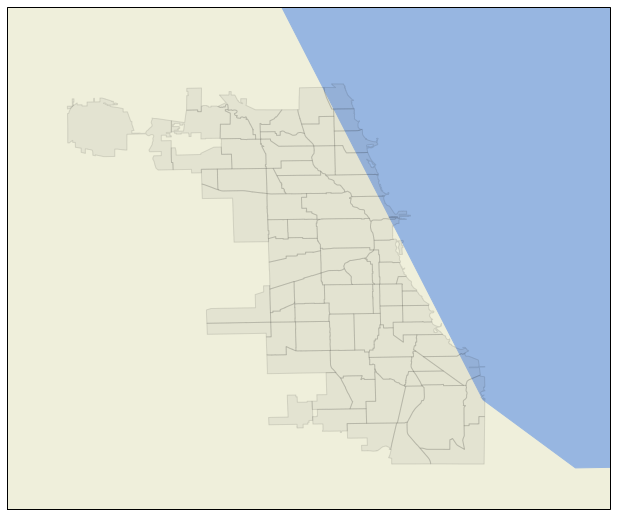

In [59]:

plt.figure(figsize=(14,9))

plt.title('Chicago')

ax = plt.axes(projection=ccrs.PlateCarree(), zorder=1)
ax.coastlines(resolution='10m', zorder=1)

ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.1)

ax.set_extent([-88, -87.4, 41.6, 42.1], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=-1) 
ax.add_feature(cfeature.LAKES, zorder=-1)


ax.scatter(spray['Latitude'], spray['Longitude'], c='yellow', zorder=2)
ax.scatter(train['Latitude'], train['Longitude'], c='pink', zorder=2)
ax.scatter(41.995, -87.933, c='green', zorder=2)
ax.scatter(41.786, -87.752, c='green', zorder=2)

# ax.set_extent([ 41.0, 43.0, -89.0, -87.0], ccrs.PlateCarree())

#ax.show()


plt.show()

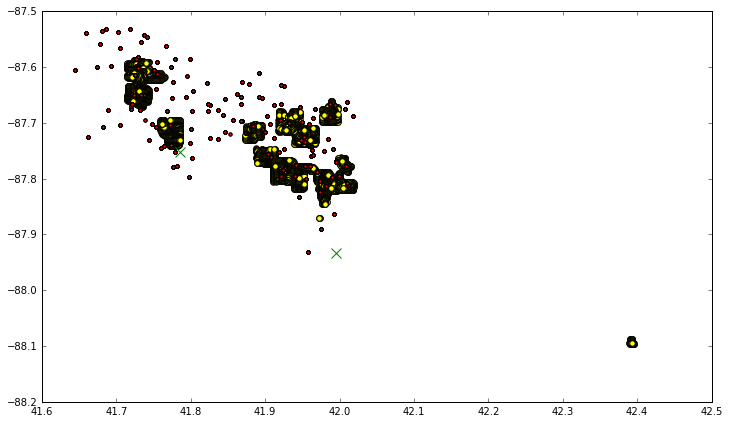

In [84]:
plt.figure(figsize=(12,7))
plt.scatter(spray['Latitude'], spray['Longitude'], c='yellow', s=30)
plt.scatter(train['Latitude'], train['Longitude'], c='red', s=10)
plt.scatter(41.995, -87.933, c='green', marker="x", s=100)
plt.scatter(41.786, -87.752, c='green', marker="x", s=100)
plt.show()